<a href="https://colab.research.google.com/github/coderdeb104/programming-foundations-data-structures-4410875/blob/main/heart_pediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Load the dataset
file_path = '/content/drive/MyDrive/Study project/heart Medical dataset.csv'
df = pd.read_csv(file_path)


In [ ]:
# Prepare the data
X = df.drop('Result', axis=1)  # Features, Assuming "condition" is the correct target column name.
y = df['Result']  # Target variable, Assuming "condition" is the correct target column name.

In [ ]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#Make predictions
y_pred = model.predict(X_test)


#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7992424242424242
              precision    recall  f1-score   support

    negative       0.75      0.71      0.73       101
    positive       0.83      0.85      0.84       163

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.79       264
weighted avg       0.80      0.80      0.80       264

[[ 72  29]
 [ 24 139]]


In [ ]:
from sklearn.metrics import classification_report

# ... (your previous code for model training and prediction) ...

# Get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Get unique class labels from your target variable
class_labels = sorted(y.unique())

# Extract precision for each class using class labels
precision_0 = report[str(class_labels[0])]['precision'] # Accessing using the actual class labels
if len(class_labels) > 1:
    precision_1 = report[str(class_labels[1])]['precision']
    print(f"Precision for class {class_labels[1]}: {precision_1}") # Print using the actual class labels

# Print the precision values
print(f"Precision for class {class_labels[0]}: {precision_0}")

Precision for class positive: 0.8273809523809523
Precision for class negative: 0.75


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# ... (your previous code for model training and prediction) ...

# Get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Get unique class labels from your target variable
class_labels = sorted(y.unique())

# Extract precision for each class using class labels
precision_0 = report[str(class_labels[0])]['precision'] # Accessing using the actual class labels
if len(class_labels) > 1:
    precision_1 = report[str(class_labels[1])]['precision']
    print(f"Precision for class {class_labels[1]}: {precision_1}") # Print using the actual class labels

# Print the precision values
print(f"Precision for class {class_labels[0]}: {precision_0}")

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Precision for class positive: 0.8273809523809523
Precision for class negative: 0.75
Confusion Matrix:
[[ 72  29]
 [ 24 139]]


Precision for class positive: 0.8273809523809523
Precision for class negative: 0.75


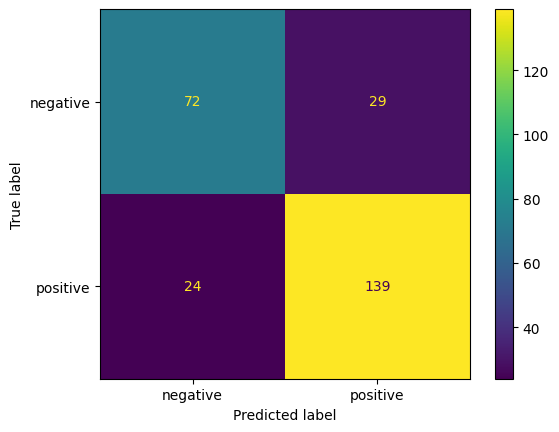

In [ ]:
!pip install scikit-learn
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ... (your previous code for model training and prediction) ...

# Get the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Get unique class labels from your target variable
class_labels = sorted(y.unique())

# Extract precision for each class using class labels
precision_0 = report[str(class_labels[0])]['precision'] # Accessing using the actual class labels
if len(class_labels) > 1:
    precision_1 = report[str(class_labels[1])]['precision']
    print(f"Precision for class {class_labels[1]}: {precision_1}") # Print using the actual class labels

# Print the precision values
print(f"Precision for class {class_labels[0]}: {precision_0}")

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix graph
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()
plt.show()

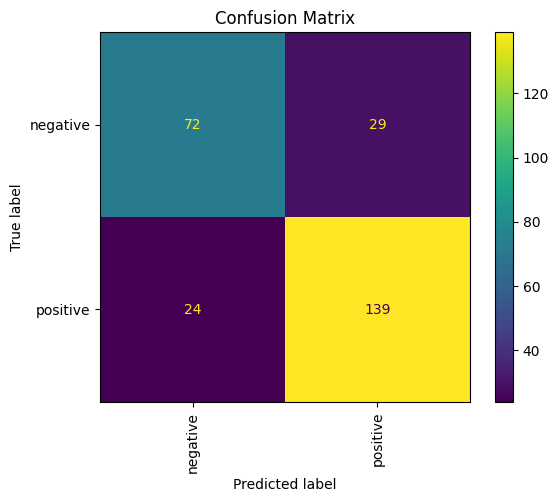

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# ... (your previous code for model training and prediction) ...

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get unique class labels from your target variable
class_labels = sorted(y.unique())

# Display the confusion matrix graph with customizations
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Remove the 'normalize' argument and calculate normalized values manually if needed
# If you need normalization, calculate it before plotting:
import numpy as np
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

disp.plot(
    include_values=True,  # Include values in the cells
    cmap='viridis',      # Use the 'viridis' colormap
    xticks_rotation='vertical',  # Rotate x-axis labels vertically
)
plt.title("Confusion Matrix")  # Set the title of the plot
plt.show()

In [ ]:
def predict_heart_disease():
    """Takes user input for features and predicts heart disease risk."""

    age = float(input("Enter age: "))
    gender = int(input("Enter gender (0 for female, 1 for male): "))
    heart_rate = float(input("Enter heart rate: "))
    systolic_bp = float(input("Enter systolic blood pressure: "))
    diastolic_bp = float(input("Enter diastolic blood pressure: "))
    blood_sugar = float(input("Enter blood sugar: "))
    ck_mb = float(input("Enter CK-MB: "))
    troponin = float(input("Enter troponin: "))

    # Create a DataFrame for the input data
    input_data = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'Heart rate': [heart_rate],
        'Systolic blood pressure': [systolic_bp],
        'Diastolic blood pressure': [diastolic_bp],
        'Blood sugar': [blood_sugar],
        'CK-MB': [ck_mb],
        'Troponin': [troponin]
    })

    # Make the prediction
    prediction = model.predict(input_data)[0]

    # Print the prediction
    if prediction == 0:
        print("The predicted result is: No Heart Disease")
    else:
        print("The predicted result is: Heart Disease")

# Call the function to start the prediction
predict_heart_disease()